In [1]:
!pip install librosa


In [2]:
import os
import numpy as np
import pandas as pd
import librosa
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [4]:
DATASET_PATH = "100 songs MP3"

MOODS = [
    "Angry mp3",
    "Happy mp3",
    "Relaxed mp3",
    "Sad mp3"
]


In [5]:
def extract_features(file_path):
    try:
        y, sr = librosa.load(file_path, sr=None)
        
        # RMS
        rms = librosa.feature.rms(y=y)[0]
        mean_rms = np.mean(rms)
        
        # ZCR
        zcr = librosa.feature.zero_crossing_rate(y)[0]
        mean_zcr = np.mean(zcr)
        
        return mean_rms, mean_zcr
    
    except Exception as e:
        print(f"Error reading {file_path}: {e}")
        return None, None


In [6]:
data = []

for mood in MOODS:
    mood_path = os.path.join(DATASET_PATH, mood)
    
    for file in os.listdir(mood_path):
        if file.endswith(".mp3"):
            
            file_path = os.path.join(mood_path, file)
            
            mean_rms, mean_zcr = extract_features(file_path)
            
            if mean_rms is not None:
                data.append({
                    "filename": file,
                    "mood": mood.replace(" mp3",""),
                    "RMS": mean_rms,
                    "ZCR": mean_zcr
                })

df = pd.DataFrame(data)

print("Total lagu:", len(df))
df.head()


Total lagu: 100


,filename,mood,RMS,ZCR
0,Bella Poarch - Living Hell (Official Lyric Vid...,Angry,0.179162,0.056077
1,Billie Eilish - Happier Than Ever.mp3,Angry,0.190241,0.027300
2,Connor Kauffman - Cry (Lyrics).mp3,Angry,0.282819,0.080807
3,Dayseeker - Crying while you're dancing (Lyric...,Angry,0.262458,0.060067
4,eli. - quiet. (Lyrics).mp3,Angry,0.193448,0.091930


### **Hasil Ekstraksi Fitur**

Sebanyak 100 lagu berhasil diproses dan diekstraksi fitur akustiknya tanpa error. Setiap lagu direpresentasikan dalam bentuk numerik melalui dua fitur berbasis fisika, yaitu Root Mean Square (RMS) dan Zero Crossing Rate (ZCR), serta diberi label mood sesuai dengan kategori folder asalnya.

Fitur RMS merepresentasikan rata-rata energi sinyal audio, yang berkaitan dengan tingkat intensitas atau loudness lagu. Sementara itu, ZCR merepresentasikan tingkat perubahan polaritas sinyal, yang mengindikasikan karakteristik tekstur atau kekasaran suara.

Contoh data yang ditampilkan (kategori Angry) menunjukkan adanya variasi nilai RMS dan ZCR antar lagu dalam satu kategori mood. Hal ini menunjukkan bahwa meskipun berada dalam kelas emosi yang sama, karakteristik energi dan tekstur audio tetap bervariasi.

Dataset hasil ekstraksi ini selanjutnya digunakan untuk analisis distribusi dan perbandingan fitur antar mood.




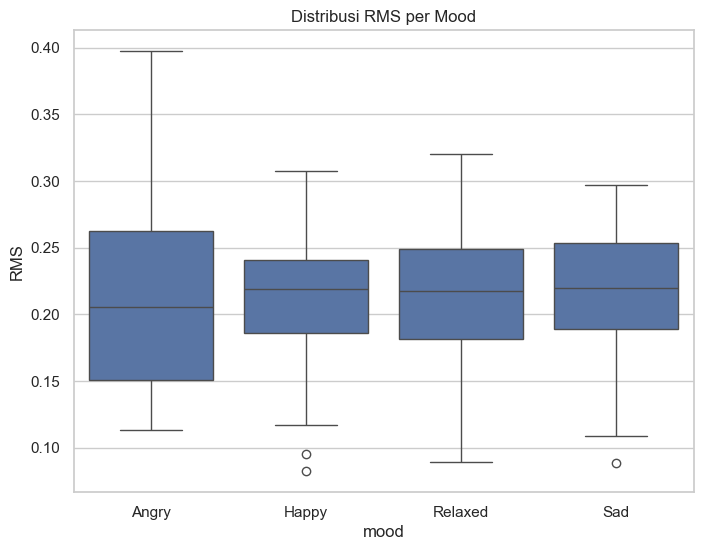

In [7]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="mood", y="RMS")
plt.title("Distribusi RMS per Mood")
plt.show()


### **Analisis Distribusi RMS per Mood**

Boxplot menunjukkan distribusi nilai RMS pada setiap kategori mood. RMS merepresentasikan tingkat energi atau intensitas sinyal audio. Terlihat bahwa median RMS pada keempat mood berada pada rentang yang relatif berdekatan (sekitar 0.20–0.22), sehingga tidak terdapat perbedaan yang sangat mencolok antar kategori.

Kategori Angry memiliki rentang distribusi yang lebih lebar serta nilai maksimum yang lebih tinggi, menunjukkan variasi energi yang lebih besar dalam kelas tersebut. Namun, distribusi antar mood masih saling tumpang tindih (overlap), terutama antara Angry dan Happy maupun antara Relaxed dan Sad.

Hal ini menunjukkan bahwa fitur RMS mampu merepresentasikan tingkat energi lagu, tetapi belum cukup kuat untuk membedakan kategori emosi secara spesifik hanya berdasarkan energi saja.

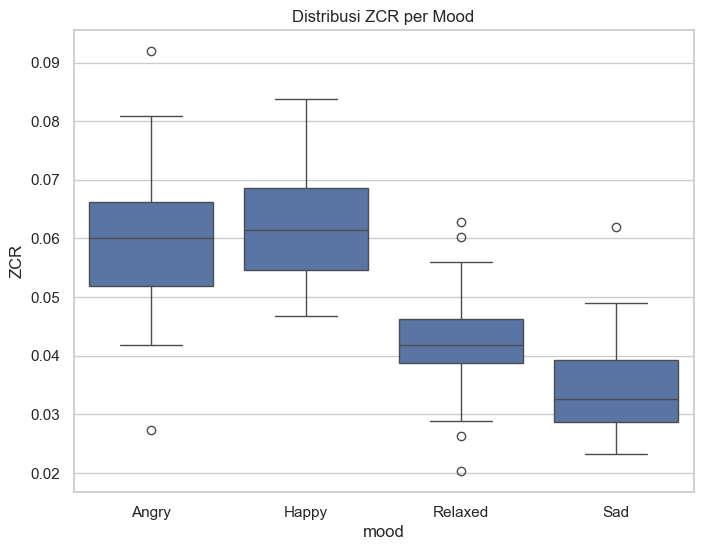

In [8]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="mood", y="ZCR")
plt.title("Distribusi ZCR per Mood")
plt.show()


### **Analisis Distribusi ZCR per Mood**

Boxplot menunjukkan distribusi nilai Zero Crossing Rate (ZCR) pada setiap kategori mood. ZCR merepresentasikan tingkat perubahan polaritas sinyal audio, yang berkaitan dengan karakteristik tekstur atau kekasaran suara.

Terlihat bahwa kategori Angry dan Happy memiliki median ZCR yang lebih tinggi dibanding Relaxed dan Sad, menunjukkan bahwa lagu dengan arousal tinggi cenderung memiliki tekstur yang lebih dinamis atau lebih kasar. Sebaliknya, kategori Sad memiliki nilai ZCR paling rendah, yang mengindikasikan karakter suara yang lebih halus.

Meskipun terdapat perbedaan pola antara kelompok arousal tinggi dan rendah, distribusi antara Angry dan Happy masih menunjukkan overlap. Hal ini mengindikasikan bahwa fitur ZCR mampu membedakan tingkat arousal secara umum, tetapi belum cukup untuk memisahkan emosi spesifik secara tegas.

In [9]:
print("Mean RMS per mood:")
print(df.groupby("mood")["RMS"].mean())

print("\nMean ZCR per mood:")
print(df.groupby("mood")["ZCR"].mean())


Mean RMS per mood:
mood
Angry      0.215170
Happy      0.205605
Relaxed    0.211146
Sad        0.214840
Name: RMS, dtype: float32

Mean ZCR per mood:
mood
Angry      0.059608
Happy      0.062537
Relaxed    0.042150
Sad        0.034582
Name: ZCR, dtype: float64


### **Rata-rata RMS dan ZCR per Mood**

Perhitungan rata-rata menunjukkan bahwa nilai RMS pada seluruh kategori berada pada rentang yang sangat berdekatan (sekitar 0.205–0.215). Nilai tertinggi terdapat pada kategori Angry (0.215) dan Sad (0.215), sedangkan Happy (0.206) sedikit lebih rendah. Hal ini menunjukkan bahwa secara rata-rata, tingkat energi antar mood tidak berbeda secara signifikan.

Sebaliknya, nilai rata-rata ZCR menunjukkan pola yang lebih jelas. Kategori Happy (0.062) dan Angry (0.059) memiliki nilai lebih tinggi dibanding Relaxed (0.042) dan Sad (0.035). Pola ini konsisten dengan asumsi bahwa mood dengan arousal tinggi cenderung memiliki tekstur sinyal yang lebih dinamis dibanding mood dengan arousal rendah.

Secara keseluruhan, RMS belum menunjukkan pemisahan yang kuat antar mood, sementara ZCR lebih mampu membedakan kelompok arousal tinggi dan rendah. Namun, nilai antara Angry dan Happy masih berdekatan, sehingga fitur dasar ini belum cukup untuk memisahkan emosi spesifik secara tegas.

In [10]:
from scipy.stats import f_oneway

angry = df[df["mood"]=="Angry"]["RMS"]
happy = df[df["mood"]=="Happy"]["RMS"]
sad = df[df["mood"]=="Sad"]["RMS"]
relaxed = df[df["mood"]=="Relaxed"]["RMS"]

f_stat, p_value = f_oneway(angry, happy, sad, relaxed)

print("ANOVA RMS p-value:", p_value)


ANOVA RMS p-value: 0.9443183


### **Uji ANOVA untuk Fitur RMS**

Uji ANOVA satu arah dilakukan untuk menguji apakah terdapat perbedaan rata-rata nilai RMS yang signifikan antar kategori mood (Angry, Happy, Sad, dan Relaxed). Hasil pengujian menunjukkan nilai p-value = 0.9443.

Karena p-value jauh lebih besar dari batas signifikansi umum (α = 0.05), maka tidak terdapat perbedaan yang signifikan secara statistik pada rata-rata RMS antar mood. Dengan demikian, hipotesis bahwa tingkat energi (RMS) berbeda antar kategori emosi tidak dapat didukung oleh data.

Hasil ini menunjukkan bahwa fitur berbasis energi (RMS) tidak cukup kuat untuk membedakan kategori mood secara signifikan pada dataset ini.

In [11]:
from scipy.stats import f_oneway

angry_zcr = df[df["mood"]=="Angry"]["ZCR"]
happy_zcr = df[df["mood"]=="Happy"]["ZCR"]
sad_zcr = df[df["mood"]=="Sad"]["ZCR"]
relaxed_zcr = df[df["mood"]=="Relaxed"]["ZCR"]

f_stat_zcr, p_value_zcr = f_oneway(angry_zcr, happy_zcr, sad_zcr, relaxed_zcr)

print("ANOVA ZCR p-value:", p_value_zcr)


ANOVA ZCR p-value: 2.1218869153213232e-16


### **Uji ANOVA untuk Fitur ZCR**

Uji ANOVA satu arah dilakukan untuk menguji apakah terdapat perbedaan rata-rata nilai Zero Crossing Rate (ZCR) antar kategori mood (Angry, Happy, Sad, dan Relaxed). Hasil pengujian menunjukkan nilai p-value = 2.12 × 10⁻¹⁶, yang jauh lebih kecil dari batas signifikansi umum (α = 0.05).

Karena p-value < 0.05, maka hipotesis nol yang menyatakan tidak adanya perbedaan rata-rata ZCR antar mood ditolak. Hal ini menunjukkan bahwa terdapat perbedaan yang signifikan secara statistik pada nilai ZCR antar kategori mood. Dengan demikian, fitur ZCR terbukti mampu membedakan karakteristik antar mood secara signifikan, khususnya dalam membedakan kelompok dengan arousal tinggi dan rendah.

Hasil ini menunjukkan bahwa dibandingkan dengan RMS, fitur berbasis tekstur sinyal (ZCR) memiliki daya diskriminatif yang lebih kuat dalam analisis emosi musik pada dataset ini.